In [1]:
%matplotlib widget
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from algorithms.utils import LinearRegressionModel

plt.style.use('fivethirtyeight')
# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")
files = os.listdir(path)
files = os.path.join(path, files[0])
print(files)

C:\Users\DELL\.cache\kagglehub\datasets\nikhil7280\student-performance-multiple-linear-regression\versions\1\Student_Performance.csv


In [2]:
df = pd.read_csv(files)

In [3]:
df.columns = [
    "Hours_Studied",
    "Previous_Scores",
    "Extra_Act",
    "Sleep_Hours",
    "Question_Practiced",
    "Performance_Index"
]

In [4]:
df.head()

,Hours_Studied,Previous_Scores,Extra_Act,Sleep_Hours,Question_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.Extra_Act = (df.Extra_Act == 'Yes').astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hours_Studied       10000 non-null  int64  
 1   Previous_Scores     10000 non-null  int64  
 2   Extra_Act           10000 non-null  int64  
 3   Sleep_Hours         10000 non-null  int64  
 4   Question_Practiced  10000 non-null  int64  
 5   Performance_Index   10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [7]:
df.describe()

,Hours_Studied,Previous_Scores,Extra_Act,Sleep_Hours,Question_Practiced,Performance_Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


# 1 univariate Analysis

## 1.1 Hourse_Studied

In [8]:
df.Hours_Studied.value_counts()

Hours_Studied
1    1152
6    1133
7    1129
3    1119
9    1115
5    1094
8    1088
4    1085
2    1085
Name: count, dtype: int64

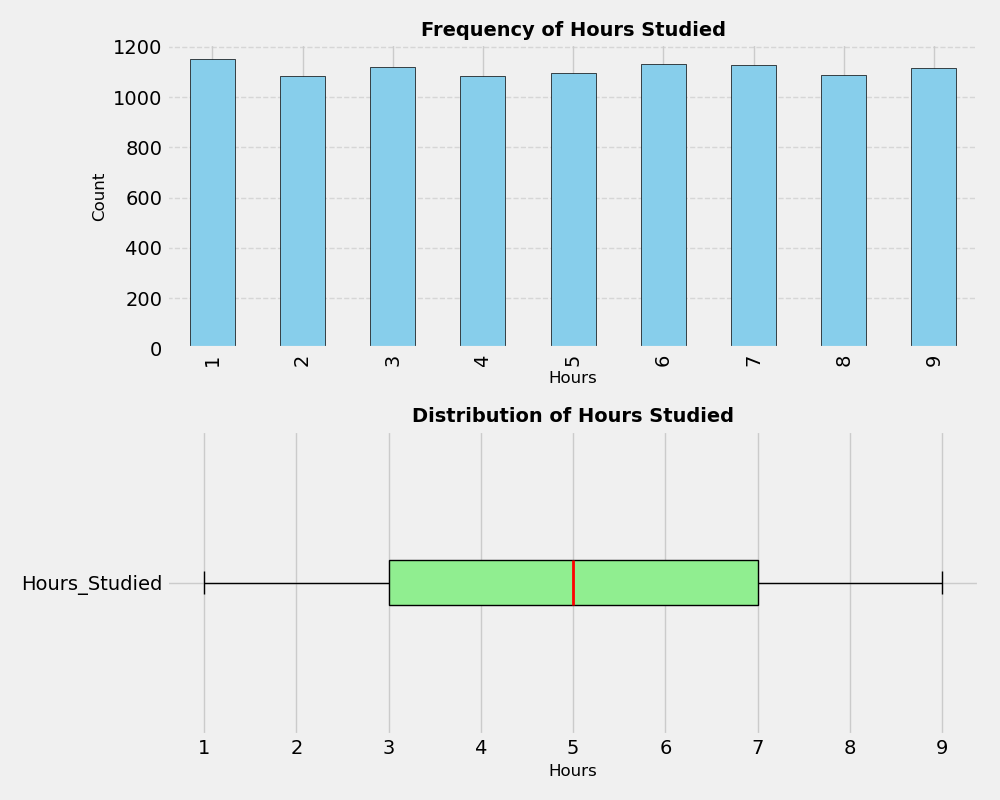

In [9]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# --- Top: Bar chart of counts ---
df.Hours_Studied.value_counts().sort_index().plot.bar(
    ax=ax1, 
    color="skyblue", 
    edgecolor="black"
)
ax1.set_title("Frequency of Hours Studied", fontsize=14, fontweight="bold")
ax1.set_xlabel("Hours", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# --- Bottom: Boxplot of distribution ---
df.Hours_Studied.plot.box(
    ax=ax2, 
    vert=False,        # horizontal boxplot looks nicer here
    patch_artist=True, # allows filling with color
    boxprops=dict(facecolor="lightgreen", color="black"),
    medianprops=dict(color="red", linewidth=2),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    flierprops=dict(markerfacecolor="orange", marker="o", markersize=6, alpha=0.7)
)
ax2.set_title("Distribution of Hours Studied", fontsize=14, fontweight="bold")
ax2.set_xlabel("Hours", fontsize=12)

plt.tight_layout()
plt.show()

## 1.2 Previous_Scores

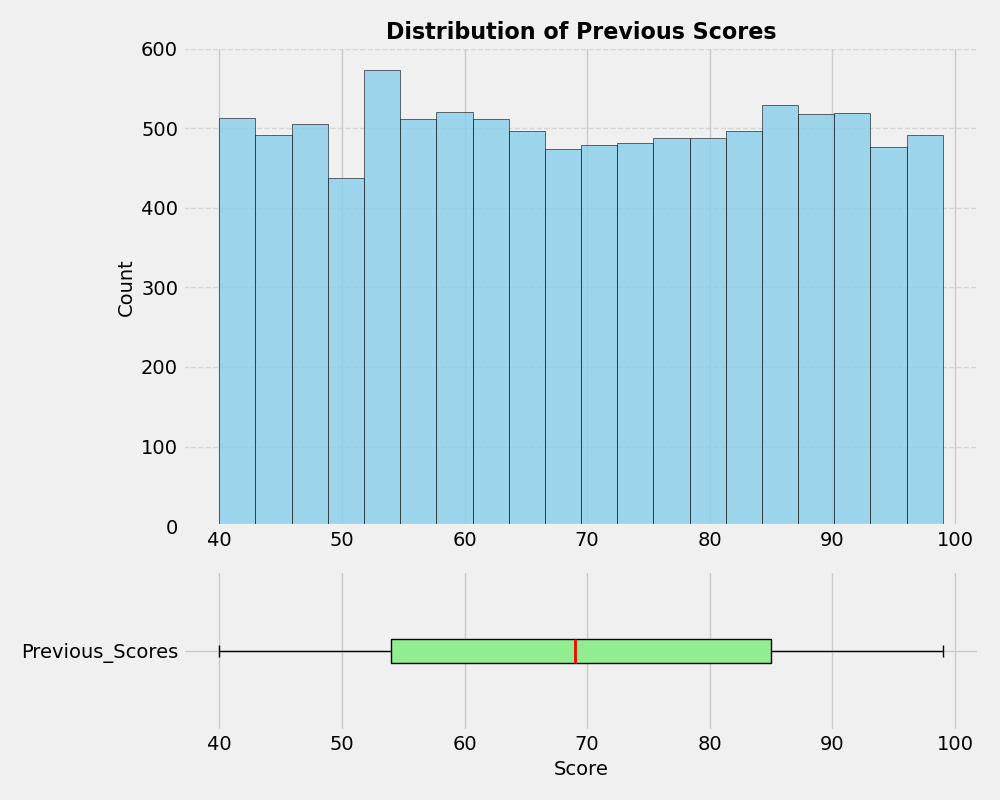

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), 
                               gridspec_kw={'height_ratios': [3, 1]})

# --- Histogram (top) ---
df.Previous_Scores.plot.hist(
    bins=20,
    color="skyblue",
    edgecolor="black",
    alpha=0.8,
    ax=ax1
)
ax1.set_title("Distribution of Previous Scores", fontsize=16, fontweight="bold")
ax1.set_xlabel("")
ax1.set_ylabel("Count", fontsize=14)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# --- Boxplot (bottom) ---
df.Previous_Scores.plot.box(
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="lightgreen", color="black"),
    medianprops=dict(color="red", linewidth=2),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    flierprops=dict(markerfacecolor="orange", marker="o", markersize=6, alpha=0.7),
    ax=ax2
)
ax2.set_xlabel("Score", fontsize=14)

plt.tight_layout()
plt.show()


## 1.3 Participation in Extra Activities

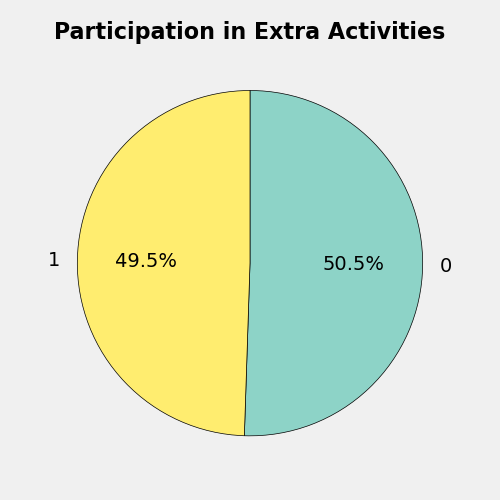

In [11]:
plt.figure(figsize=(5,5))  # make it square for a proper pie

df.Extra_Act.value_counts().plot.pie(
    autopct="%1.1f%%",       # show percentages with 1 decimal
    startangle=90,           # start from top
    cmap="Set3",             # nice color palette
    counterclock=False,      # clockwise order
    wedgeprops=dict(edgecolor="black")  # black edges for separation
)

plt.title("Participation in Extra Activities", fontsize=16, fontweight="bold")
plt.ylabel("")  # remove the default y-label
plt.tight_layout()
plt.show()

## 1.4 Sleep Hours

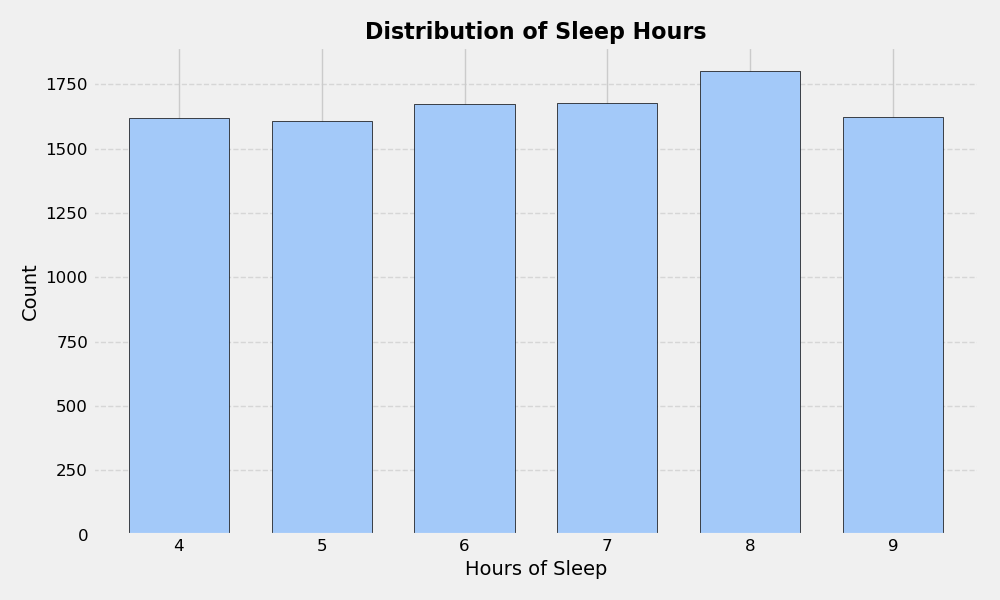

In [12]:
plt.figure(figsize=(10,6))

df.Sleep_Hours.value_counts().sort_index().plot.bar(
    edgecolor="black",
    color="#a3c9f9",   # a softer light blue
    width=0.7
)

plt.title("Distribution of Sleep Hours", fontsize=16, fontweight="bold")
plt.xlabel("Hours of Sleep", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=0, fontsize=12)  # keep x labels horizontal
plt.yticks(fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.7)  # subtle horizontal gridlines
plt.tight_layout()
plt.show()


## 1.5 Practiced Questions 

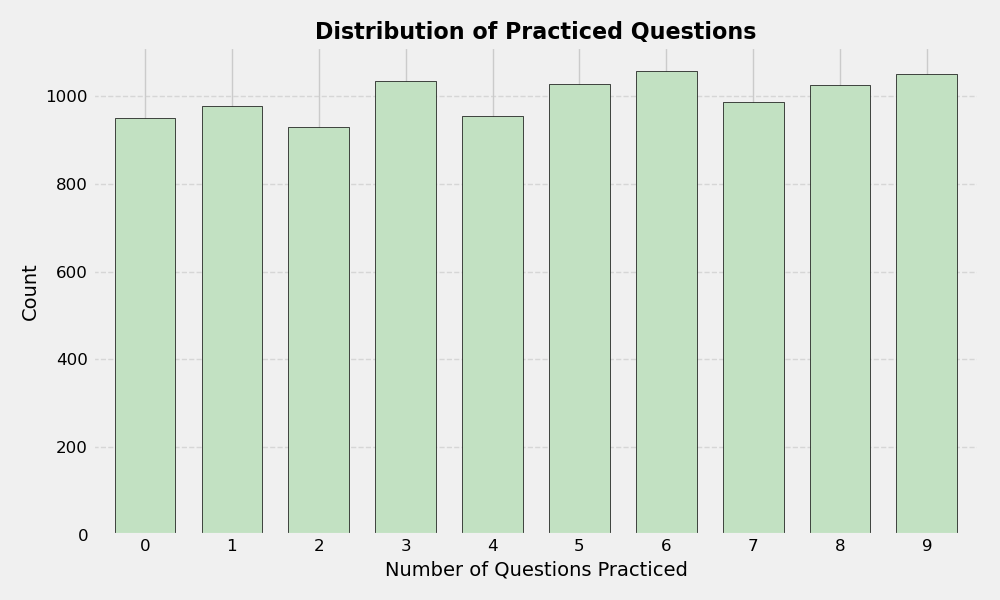

In [13]:
plt.figure(figsize=(10,6))

df.Question_Practiced.value_counts().sort_index().plot.bar(
    color="#c2e1c2",    # soft light green
    edgecolor="black",
    width=0.7
)

plt.title("Distribution of Practiced Questions", fontsize=16, fontweight="bold")
plt.xlabel("Number of Questions Practiced", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## 1.6 Performance Index

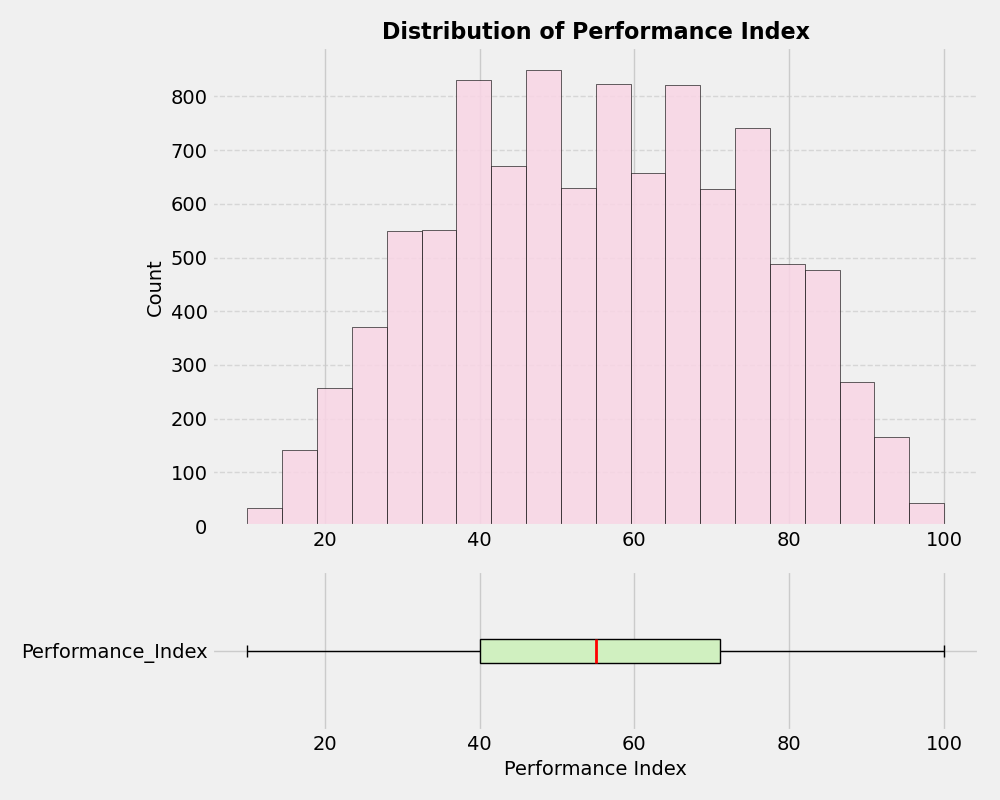

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), 
                               gridspec_kw={'height_ratios': [3, 1]})

# --- Histogram (top) ---
df.Performance_Index.plot.hist(
    bins=20,
    color="#f9d5e5",
    edgecolor="black",
    alpha=0.85,
    ax=ax1
)
ax1.set_title("Distribution of Performance Index", fontsize=16, fontweight="bold")
ax1.set_xlabel("")
ax1.set_ylabel("Count", fontsize=14)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# --- Boxplot (bottom) ---
df.Performance_Index.plot.box(
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="#d0f0c0", color="black"),   # light green box
    medianprops=dict(color="red", linewidth=2),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    flierprops=dict(markerfacecolor="orange", marker="o", markersize=6, alpha=0.7),
    ax=ax2
)
ax2.set_xlabel("Performance Index", fontsize=14)

plt.tight_layout()
plt.show()


# 2 Bivariate Analysis

## 1.1 Hourse_Studied

In [15]:
hourse_group = df.groupby('Hours_Studied')

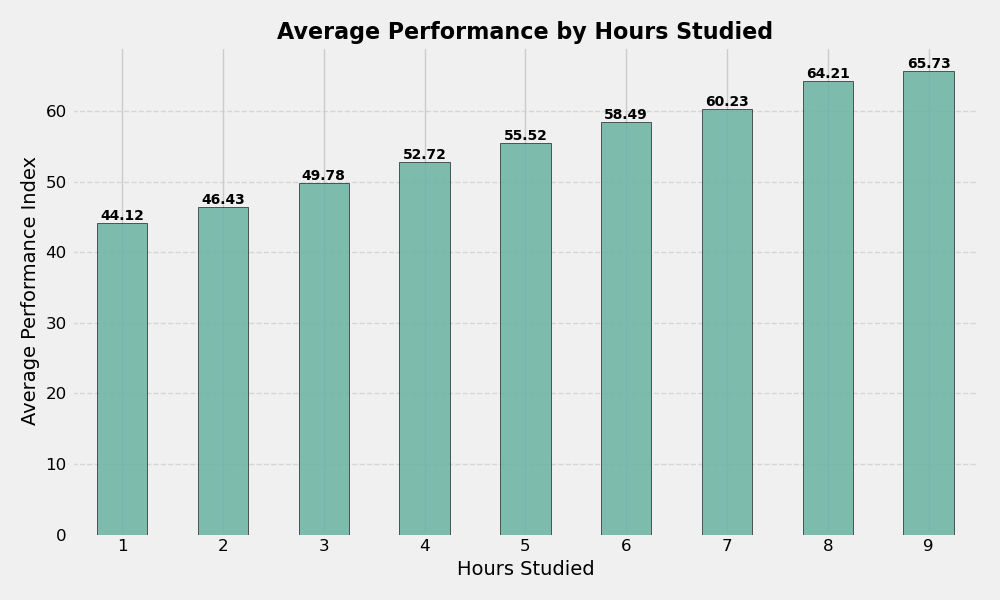

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot group means as bar chart
ax = hourse_group['Performance_Index'].mean().plot(
    kind="bar",
    color="#69b3a2",       # soft teal color
    edgecolor="black",     # black edges for clarity
    alpha=0.85,            # slight transparency
    zorder=3
)

# Add labels and title
plt.title("Average Performance by Hours Studied", fontsize=16, fontweight="bold")
plt.xlabel("Hours Studied", fontsize=14)
plt.ylabel("Average Performance Index", fontsize=14)

# Add grid lines for readability
plt.grid(axis="y", linestyle="--", alpha=0.7, zorder=0)

# Rotate x labels if needed
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Annotate values on top of bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',   # format with 2 decimals
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold', color="black"
    )

# Tight layout for cleaner spacing
plt.tight_layout()
plt.show()


## 1.2 Previous_Scores

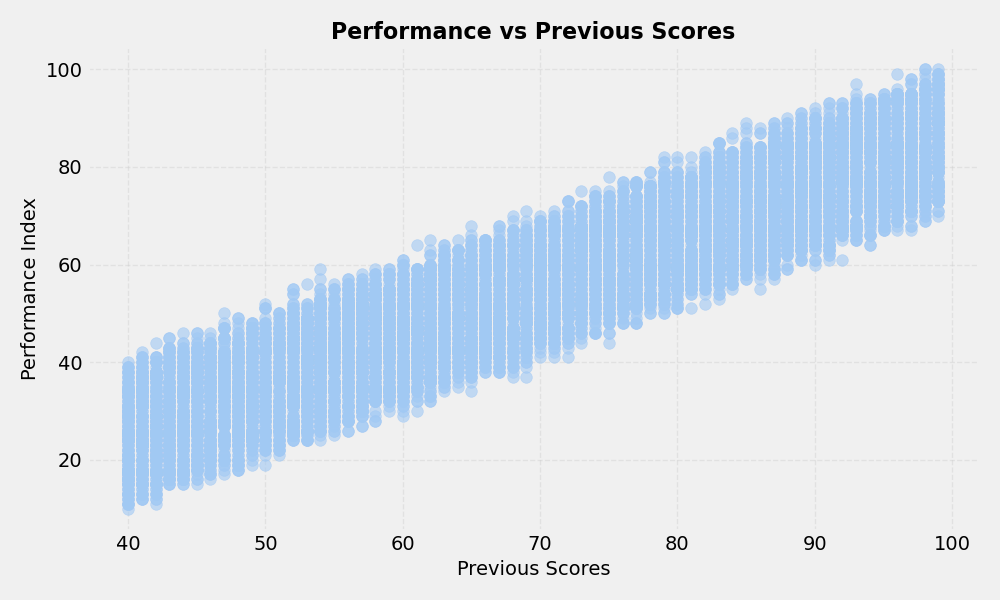

In [17]:
plt.figure(figsize=(10, 6))

# Scatter with softer, relaxing style
plt.scatter(
    df["Previous_Scores"],
    df["Performance_Index"],
    color="#a1c9f4",   # light pastel blue
    alpha=0.6,         # gentle transparency
    s=70               # moderate size
)

# Labels and title
plt.title("Performance vs Previous Scores", fontsize=16, fontweight="bold")
plt.xlabel("Previous Scores", fontsize=14)
plt.ylabel("Performance Index", fontsize=14)

# Subtle gridlines
plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


## 1.3 Extra_Act

In [18]:
act_group = df.groupby('Extra_Act')

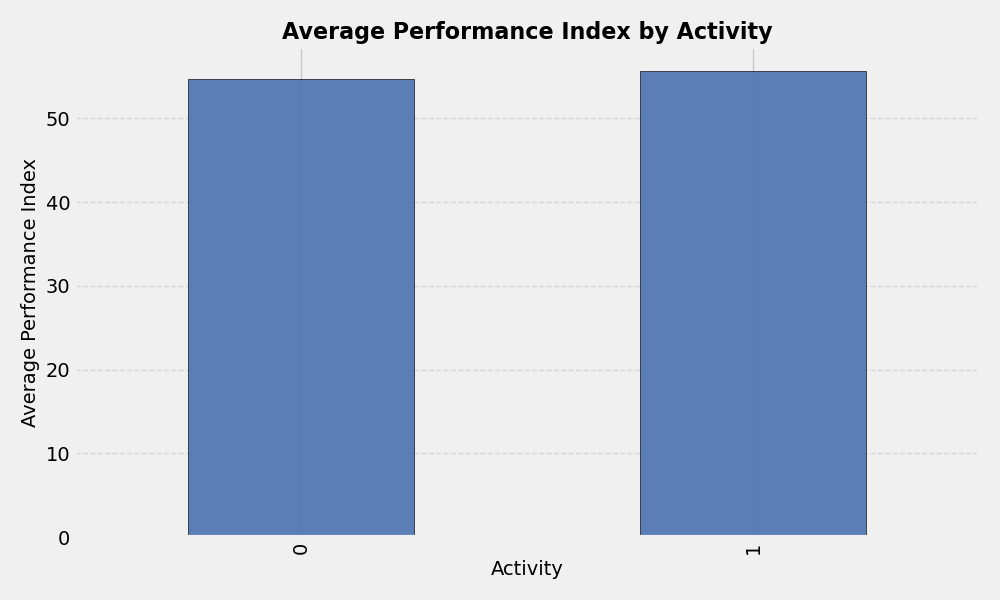

In [19]:
plt.figure(figsize=(10, 6))

act_group['Performance_Index'].mean().plot.bar(
    color="#4C72B0",     # strong but professional blue
    edgecolor="black",   # bold borders for bars
    alpha=0.9
)

plt.title("Average Performance Index by Activity", fontsize=16, fontweight="bold")
plt.xlabel("Activity", fontsize=14)
plt.ylabel("Average Performance Index", fontsize=14)

# Add clean gridlines only on y-axis
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


## 1.4 Sleep_Hours

In [20]:
Sleep_group = df.groupby('Sleep_Hours')

In [21]:
Sleep_group['Performance_Index'].mean()

Sleep_Hours
4    53.794935
5    54.801370
6    54.660490
7    55.278043
8    55.932373
9    56.811344
Name: Performance_Index, dtype: float64

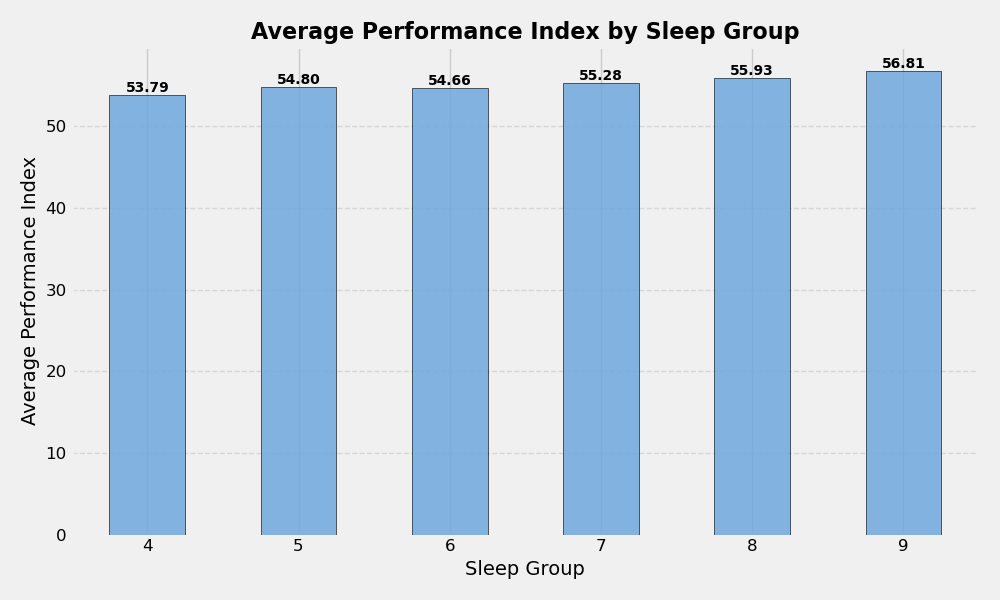

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot the bar chart
ax = Sleep_group['Performance_Index'].mean().plot.bar(
    color="#6fa8dc",   # calm blue
    edgecolor="black", # clean outline
    alpha=0.85,        # slight transparency for softness
    zorder=3
)

# Titles and labels
plt.title("Average Performance Index by Sleep Group", fontsize=16, fontweight="bold")
plt.xlabel("Sleep Group", fontsize=14)
plt.ylabel("Average Performance Index", fontsize=14)

# Grid and ticks
plt.grid(axis="y", linestyle="--", alpha=0.7, zorder=0)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Annotate values on top of bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',   # format with 2 decimals
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold', color="black"
    )

plt.tight_layout()
plt.show()


## 1.5 Question_Practiced

In [23]:
practiced_group = df.groupby('Question_Practiced')

In [24]:
practiced_group['Performance_Index'].mean()

Question_Practiced
0    52.946372
1    54.606339
2    55.264516
3    55.257005
4    54.148691
5    55.451362
6    56.147309
7    55.776089
8    55.454191
9    56.880114
Name: Performance_Index, dtype: float64

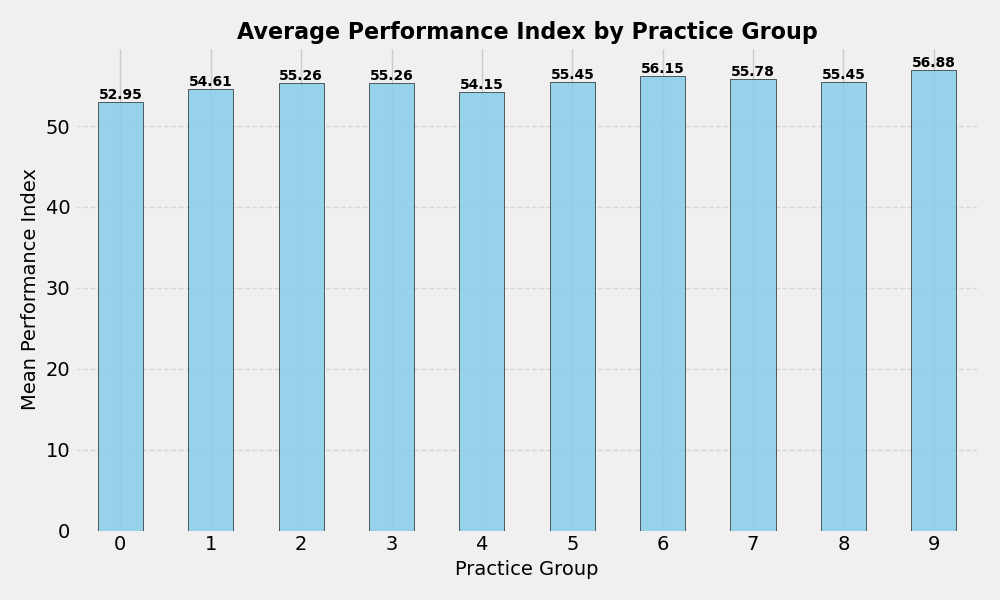

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Create the bar chart
ax = practiced_group['Performance_Index'].mean().plot.bar(
    color="#87CEEB",       
    edgecolor="black",     
    alpha=0.85,
    zorder=3               # keeps bars above gridlines
)

# Add titles and labels
plt.title("Average Performance Index by Practice Group", fontsize=16, fontweight="bold")
plt.xlabel("Practice Group", fontsize=14)
plt.ylabel("Mean Performance Index", fontsize=14)

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7, zorder=0)

# Rotate x-ticks if needed
plt.xticks(rotation=0, ha="center")

# Annotate values on top of bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',   # format value with 2 decimals
        (p.get_x() + p.get_width() / 2., p.get_height()),  # position
        ha='center', va='bottom', fontsize=10, fontweight='bold', color="black"
    )

plt.tight_layout()
plt.show()


# 3 Feature Relationships

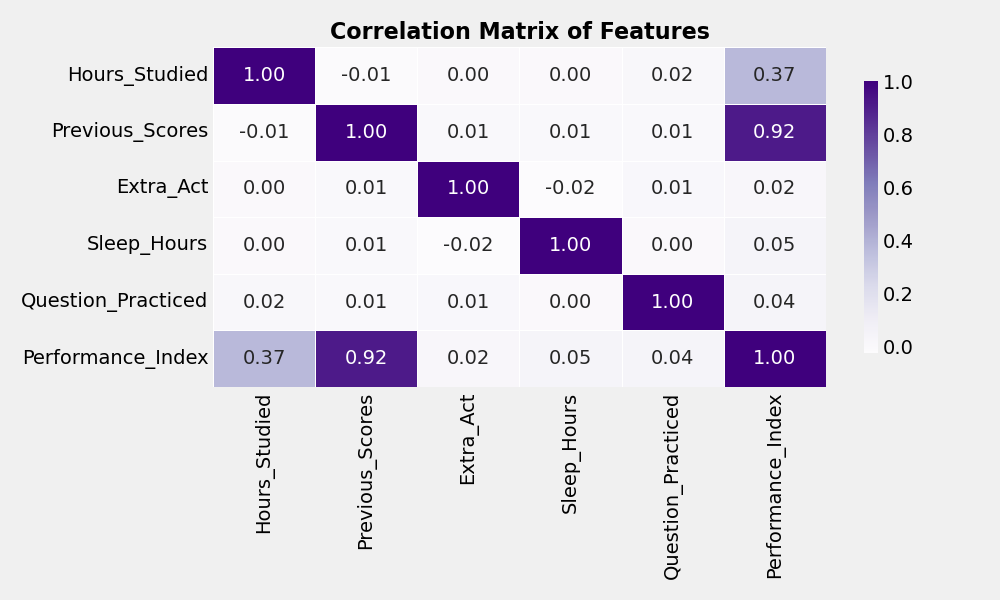

In [26]:
import seaborn as sns  # makes correlation heatmaps way prettier

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="Purples",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)



plt.title("Correlation Matrix of Features", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


# 4 Model Training

NameError: name 'tdf' is not defined